In [1]:
# Imports and basic setup
### UNCOMMENT THE CORRECT ONE
# If you are using Jupyter Lab
# %matplotlib widget

# If you are using Jupyter Notebook
%matplotlib notebook

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from scipy import signal

In [3]:
def pole_zero_plot(b, a, ax=None):
    from matplotlib import patches

    zeros, poles, _ = signal.tf2zpk(b, a)
    print("zeros: ", zeros, "\n poles:", poles)

    # To visualize pole-zero plane: plot unit circle and x,y axis
    if not ax:
        plt.figure()
        ax = plt.subplot(1, 1, 1)
    
    # Check for duplicates poles or zeros
    import collections
    multi_pole = ((k, v) for k, v in collections.Counter(poles).items() if v > 1)
    multi_zeros = ((k, v) for k, v in collections.Counter(zeros).items() if v > 1)

    # plot circle
    circ = patches.Circle((0, 0), radius=1, fill=False,
                                 color='black', ls='solid', alpha=0.1)
    ax.add_patch(circ)

    #plot axis
    ax.axhline(y=0, color='0.9')
    ax.axvline(x=0, color='0.9')

    # plot poles and zeros
    ax.plot(zeros.real, zeros.imag, 'o', markersize=9, alpha=0.5)
    ax.plot(poles.real, poles.imag, 'x', markersize=9, alpha=0.5)
    
    # Add label for duplicates
    import itertools
    for pos, c in itertools.chain(multi_pole, multi_zeros):
        ax.text(pos.real, pos.imag, c, fontsize=12)

    ax.axis('scaled')
    ax.axis([-1.5, 1.5, -1.5, 1.5])
    
    ax.set_xlabel('Re')
    ax.set_ylabel('Im')
    
def plot_freq_response(b, a, sampling_rate=None, log_y=True,create_new_fig=True, label=None):
    """Plot the freq response of a window.
    
    Args:
        coef: The coefficients of the window
        sampling_rate: The sampling rate of a potential signal to be filtered with the window
        log_y: If True the y=axis will be in base 10 log.
        create_new_fig: If True a new figure is created for the plot
    """
    if create_new_fig:
        plt.figure()
    ax1 = plt.gca()
    # Calculate the frequency response using scipy.signal.freqz 
    # Use the fs parameter to calculate the output relative to the sampling rate
    w, h = signal.freqz(b, a, fs=sampling_rate)    
    if log_y is True:
        h_plot = 20 * np.log10(abs(h))
        ax1.set_ylabel('Amplification [dB]', color='b')
    else:
        h_plot = abs(h)
        ax1.set_ylabel('Amplification [no unit]', color='b')
    
    ax1.plot(w, h_plot, 'b', label=label)
    ax1.set_xlabel('Frequency [Hz]')
    ax2 = ax1.twinx()
    angles = np.unwrap(np.angle(h))
    ax2.plot(w, angles, 'g', label=label)
    ax2.set_ylabel('Angle (radians)', color='g')
    ax2.grid()
    ax2.axis('tight')

## Ex 8.1: Butterworth Low Pass Filter

The Butterworth filter is one of the most important filters because of its flat passband.

a) Use the function `scipy.signal.butter` to design digital filters butterworth lowpass filters of different order.
Plot the magnitude response and the Pole Zero Plot for all of them.

b) Change the cutoff frequency. Explain how the poles and zeros move in the z-plane depending on the filter order and the cut-off frequency.

c) Apply the filters of different order to an example signal and describe the differences between the outputs

### Solution:
a) Increasing the filter order will increase the steepness of the filter

b) 

- Increasing the order increases the number of poles and zeros
- The zeros create a circle at -1 (or +1 for the high-pass version). Increasing the order increases the radius of this circle
- The poles a fall on a section of a circle. Increasing the order will add more poles in this section
- Changing the cutoff frequency will change the points of intersection between the circle of poles and the unit circle

c)
Increasing the filter order will increase the amount of noise removal, similar to any other low-pass filter.
However, if the order gets too high, we will see a filter artifact called filter ringing.
It will always occur, if the pass-to-stop band transition in the frequency domain is to steep.

The Fourier pair of our filter can explain this.
The closer the transfer function resembles a block, the closer its time domain representation resembles a Sinc function.
The ripples caused by the convolution with this Sinc functions can be seen in the filtered signal.

<IPython.core.display.Javascript object>


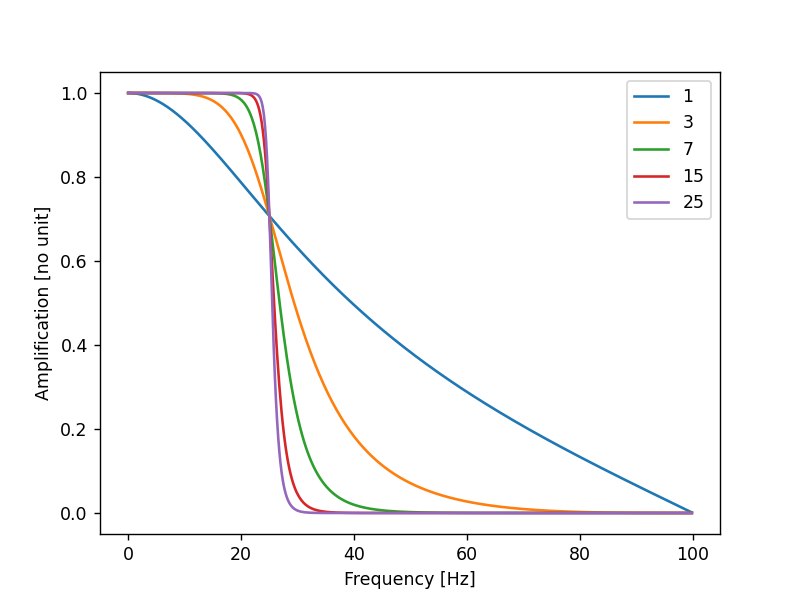

In [4]:
sampling_rate = 200

# Filter orders
ns = [1, 3, 7, 15, 25]
# Cutoff
fc = 25  # Try different values (e.g 100 Hz, 50 Hz and 75 Hz)

# Plot the magnitude responses for the filter orders provided above.
### BEGIN SOLUTION
plt.figure()
for n in ns:
    b, a = signal.butter(n, fc, 'low', analog=False, fs=sampling_rate)
    w, h = signal.freqz(b, a, fs=sampling_rate)
    plt.plot(w, np.abs(h), label=n)
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplification [no unit]')

plt.legend()
### END SOLUTION

zeros:  [-1.] 
 poles: [0.41421356]


<IPython.core.display.Javascript object>


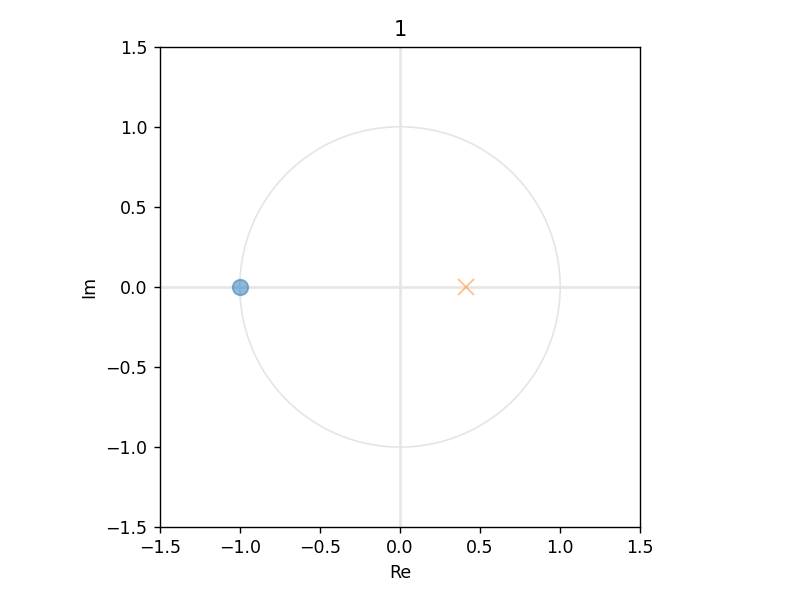

zeros:  [-0.99999591+0.0000000e+00j -1.00000205+3.5459682e-06j
 -1.00000205-3.5459682e-06j] 
 poles: [0.52240775+0.45241838j 0.52240775-0.45241838j 0.41421356+0.j        ]


<IPython.core.display.Javascript object>


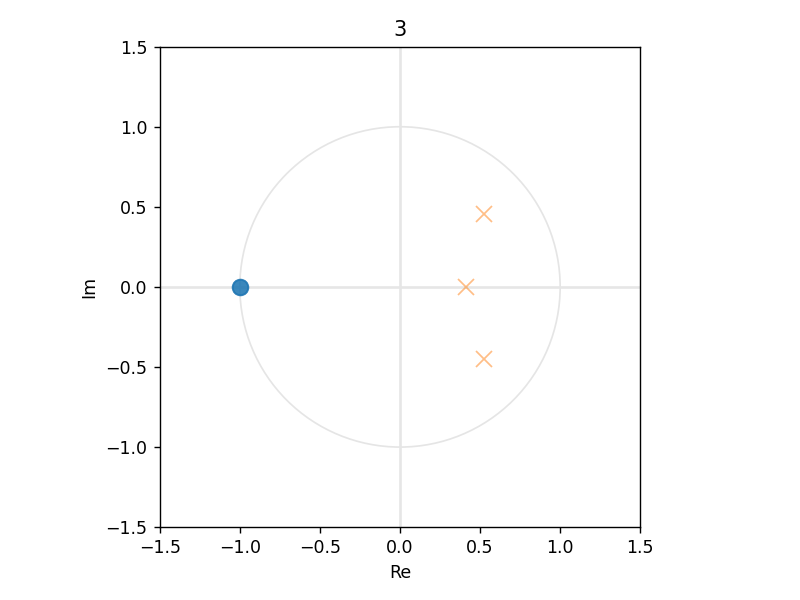

zeros:  [-1.01060349+0.j         -1.00659644+0.00829374j -1.00659644-0.00829374j
 -0.99762799+0.01031285j -0.99762799-0.01031285j -0.99047382+0.0045786j
 -0.99047382-0.0045786j ] 
 poles: [0.61097264+0.59565428j 0.61097264-0.59565428j 0.49074856+0.38368268j
 0.49074856-0.38368268j 0.43193141+0.18740801j 0.43193141-0.18740801j
 0.41421356+0.j        ]


<IPython.core.display.Javascript object>


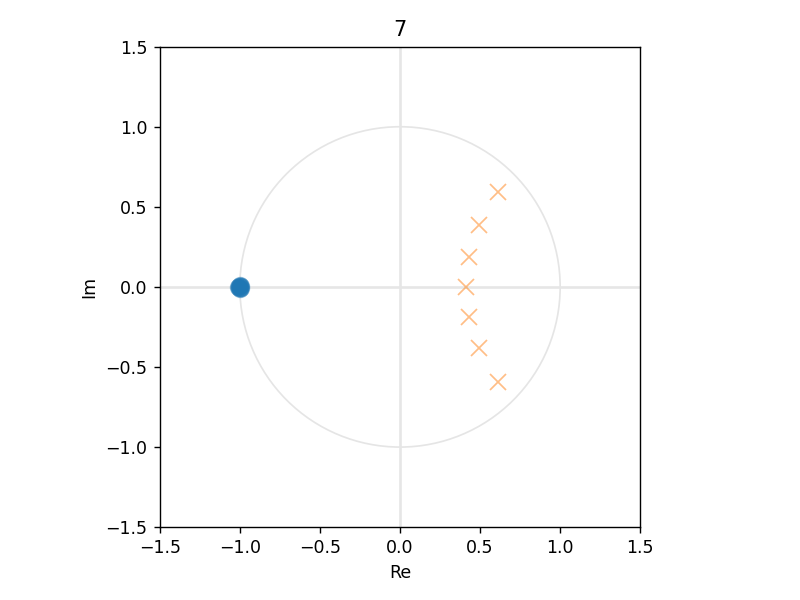

zeros:  [-1.18790374+0.j         -1.16803516+0.08124954j -1.16803516-0.08124954j
 -1.11455259+0.1429459j  -1.11455259-0.1429459j  -1.04242686+0.17312035j
 -1.04242686-0.17312035j -0.96857682+0.16979496j -0.96857682-0.16979496j
 -0.90644559+0.13872164j -0.90644559-0.13872164j -0.86362548+0.08929884j
 -0.86362548-0.08929884j -0.84238563+0.03063031j -0.84238563-0.03063031j] 
 poles: [0.65843967+0.65483267j 0.65843967-0.65483267j 0.5803054 +0.55190323j
 0.5803054 -0.55190323j 0.52240775+0.45241838j 0.52240775-0.45241838j
 0.4799975 +0.35670766j 0.4799975 -0.35670766j 0.44979591+0.2643834j
 0.44979591-0.2643834j  0.42959773+0.17473314j 0.42959773-0.17473314j
 0.41799709+0.08690648j 0.41799709-0.08690648j 0.41421356+0.j        ]


<IPython.core.display.Javascript object>


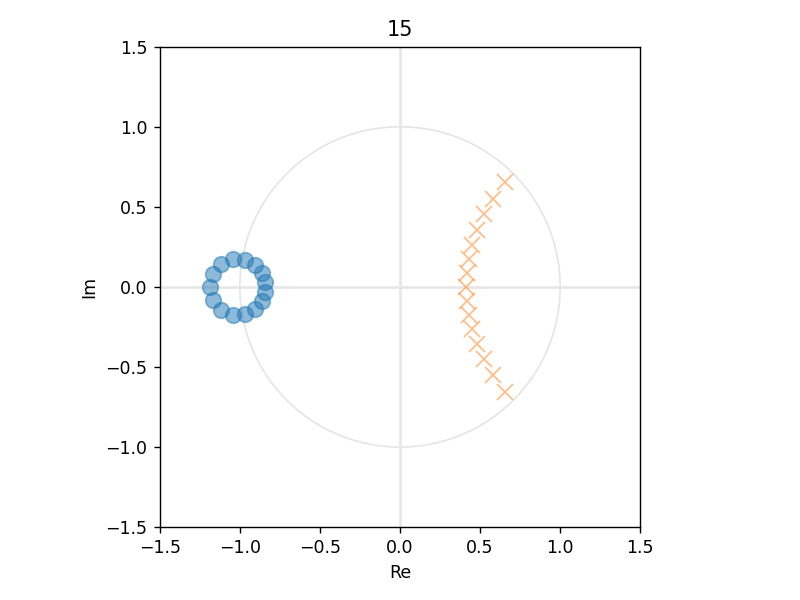

zeros:  [-1.57967212+0.08730416j -1.57967212-0.08730416j -1.52418983+0.25436221j
 -1.52418983-0.25436221j -1.4151715 +0.39231759j -1.4151715 -0.39231759j
 -1.27006955+0.47960972j -1.27006955-0.47960972j -1.11619396+0.50941526j
 -1.11619396-0.50941526j -0.9770388 +0.49098258j -0.9770388 -0.49098258j
 -0.86410404+0.44137252j -0.86410404-0.44137252j -0.77764342+0.37531255j
 -0.77764342-0.37531255j -0.71402888+0.30089211j -0.71402888-0.30089211j
 -0.67052074+0.22284429j -0.67052074-0.22284429j -0.64443935+0.14509718j
 -0.64443935-0.14509718j -0.63228419+0.07056813j -0.63228419-0.07056813j
 -0.62928722+0.j        ] 
 poles: [0.6770463 +0.67571005j 0.6770463 -0.67571005j 0.62437787+0.61331984j
 0.62437787-0.61331984j 0.5802997 +0.551899j   0.5802997 -0.551899j
 0.54349649+0.4917526j  0.54349649-0.4917526j  0.51280234+0.43299144j
 0.51280234-0.43299144j 0.48744427+0.37559038j 0.48744427-0.37559038j
 0.46641148+0.31945003j 0.46641148-0.31945003j 0.44985351+0.26396146j
 0.44985351-0.26396146j 0

<IPython.core.display.Javascript object>


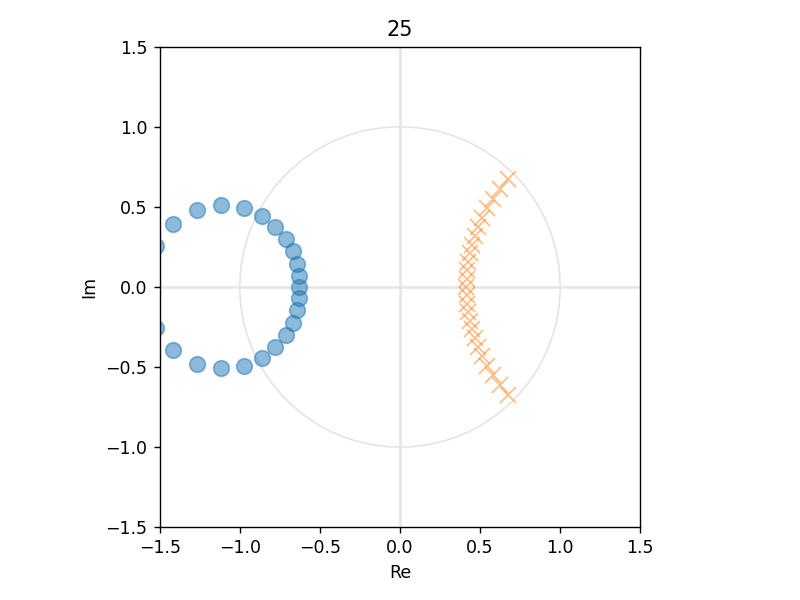

In [5]:
# Plot the Pole-Zero Plots for each filter order
### BEGIN SOLUTION
for n in ns:
    b, a = signal.butter(n, fc, 'low', analog=False, fs=sampling_rate)
    pole_zero_plot(b, a)
    plt.title(n)
    plt.tight_layout()
### END SOLUTION

<IPython.core.display.Javascript object>


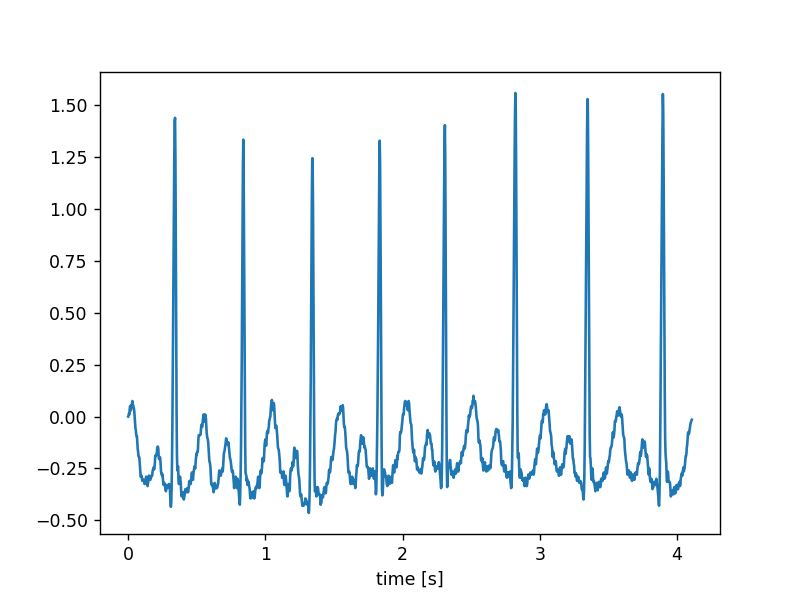

Text(0.5, 0, 'time [s]')

In [6]:
from scipy.misc import electrocardiogram

test_ecg = electrocardiogram()[65520:67000]
test_sampling_rate = 360.
x = np.arange(0, len(test_ecg)) / test_sampling_rate
plt.figure()
plt.plot(x, test_ecg)
plt.xlabel('time [s]')

<IPython.core.display.Javascript object>


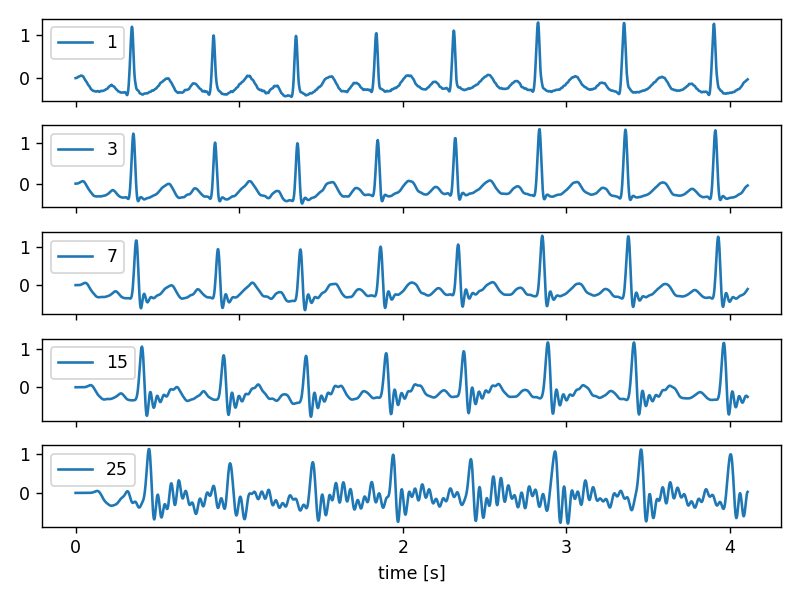

In [7]:
# Apply the filter to the test signal
### BEGIN SOLUTION
fig, axs = plt.subplots(5, sharex=True)
for n, ax in zip(ns, axs):
    b, a = signal.butter(n, fc, 'low', analog=False, fs=test_sampling_rate)
    filtered_ecg = signal.lfilter(b, a, test_ecg)
    ax.plot(x, filtered_ecg, label=n)
    ax.legend()

plt.xlabel('time [s]')
plt.tight_layout()
### END SOLUTION

## Exercise 8.2 IIR vs FIR

a) Given the two transfer functions below: Which one belongs to and IIR and which belongs to a FIR filter? Explain!

$$
y[n] + 2y[n-1] = x[n] - x[n-1]
$$

$$
y[n]= x[n] + 2x[n-1]
$$

b) Both, a Butterworth filter and a Moving Average filter can have low-pass characteristics. Design one filter of each group with the same filter order. Choose a cutoff for the butterworth filter to match the 3 db cutoff of the moving average.
Plot the phase and magnitude response. Compare the output. Which filter would you prefer?

c) Increase the filter order of both filters. At some point the IIR filter will start behaving “strangely”. Explain what happens.

### Solution:

a) The first equation is an IIR filer, and the second is a FIR filter.
The indicator is, that the first filter “reuses” past outputs (i.e. it contains “$y$” terms other than $y[n]$). This makes it recursive and hence infinite in the time domain.

b) The 3db cutoff is equivalent to $\frac{\sqrt{2}}{2}=0.707$. You can use this value to look up the cutoff of the MA and use it to design the Butterworth filter.

- The IIR filter is much steeper at the same filter order 
- The IIR filter has a “clear” pass and stop band
- The phase response of an IIR filter is not linear and much larger.

The IIR filter is better if you just want to suppress certain frequencies, if phase response is important, use an FIR filter (or `filtfilt`)

c) Increasing the filter order leads to an unstable IIR filter. You can confirm that using the Pole-Zero plot.
This is an interesting finding as we would not expect this based on the math.
However, because we perform all of our calculations on a computer, they have limited precision. Therefore, poles that are really close to the unit circle might be moved outside of the circle.
The higher the filter order the higher the chance for such calculation errors.
A solution to circumvent this problem is to use *second-order section* (sos) filtering.
This method splits your single filter of high order into multiple filters with lower order, hence, reducing the risk of numerical instabilities at every filter step.
We will look at this in a future exercise.

The FIR filter does not get unstable, as it does not have any poles (or poles that are located at z=0). This is generally true for all FIR filter.
This means, the modified filter we created in Ex. 7.3 was an IIR filter and not a FIR filter anymore.

<IPython.core.display.Javascript object>


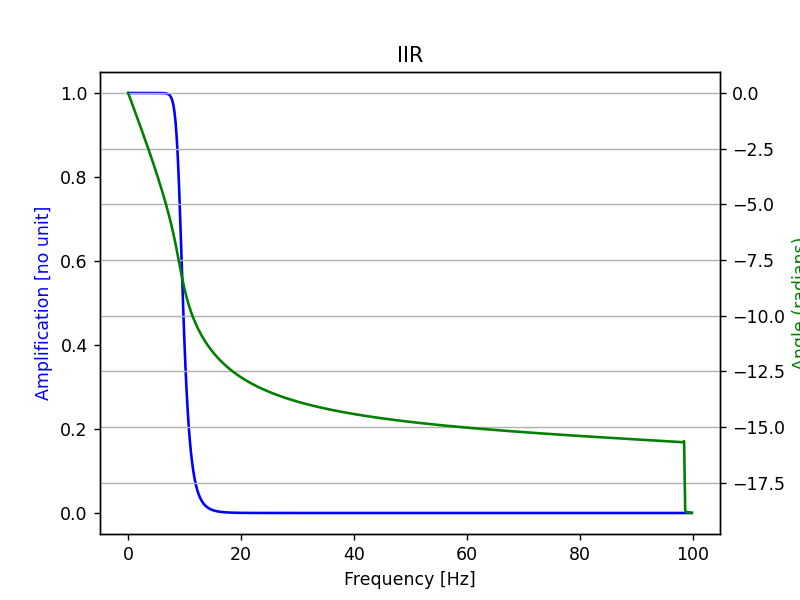

<IPython.core.display.Javascript object>


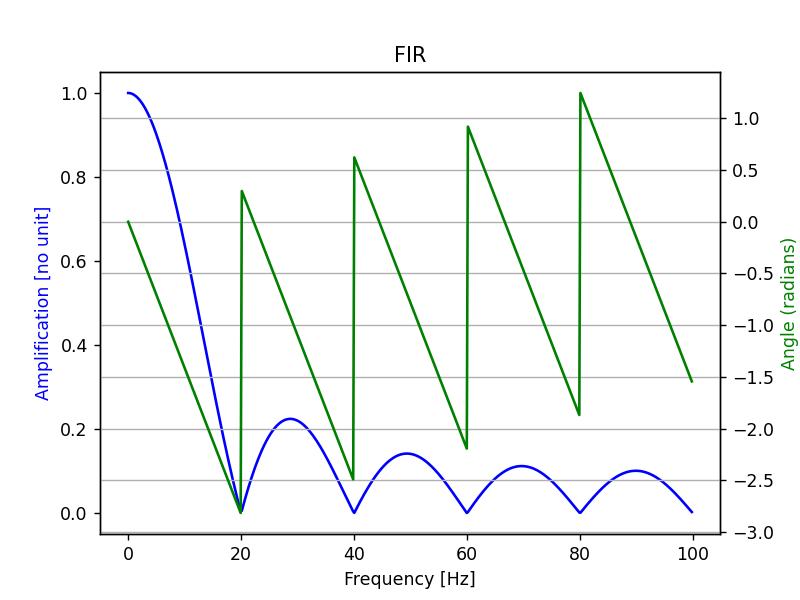

In [8]:
n=10

# Implement a IIR filter and plot its magnitude response
### BEGIN SOLUTION
f_c = 9.2 # Hz (extracted from the MA plot)
iir_b, iir_a = signal.butter(n, 9.2, 'low', analog=False, fs=sampling_rate)
plot_freq_response(iir_b, iir_a, sampling_rate=sampling_rate, log_y=False)
plt.title('IIR')
### END SOLUTION

# Implement a FIR filter and plot its magnitude response
### BEGIN SOLUTION
fir_b = 1/n * np.ones(n)
fir_a = np.zeros(n)
fir_a[0] = 1

plot_freq_response(fir_b, fir_a, sampling_rate=sampling_rate, log_y=False)
plt.title('FIR');
### END SOLUTION

<IPython.core.display.Javascript object>


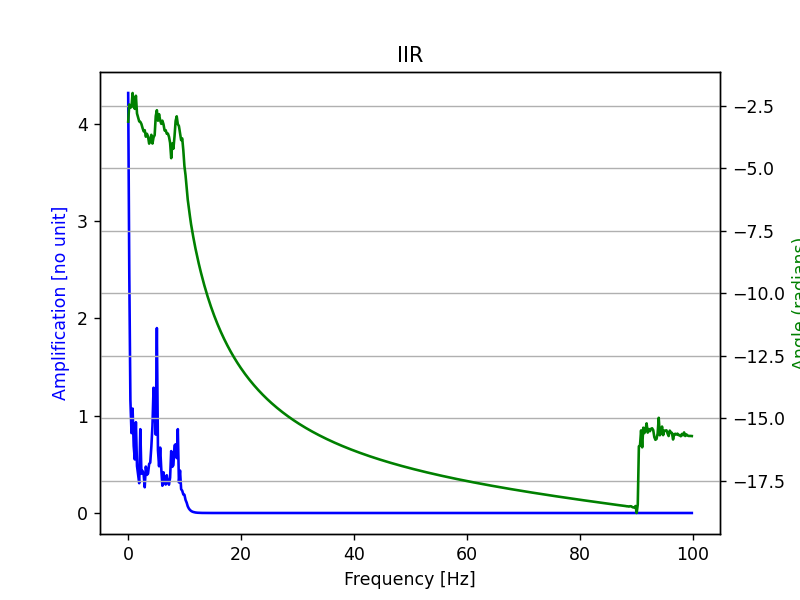

<IPython.core.display.Javascript object>


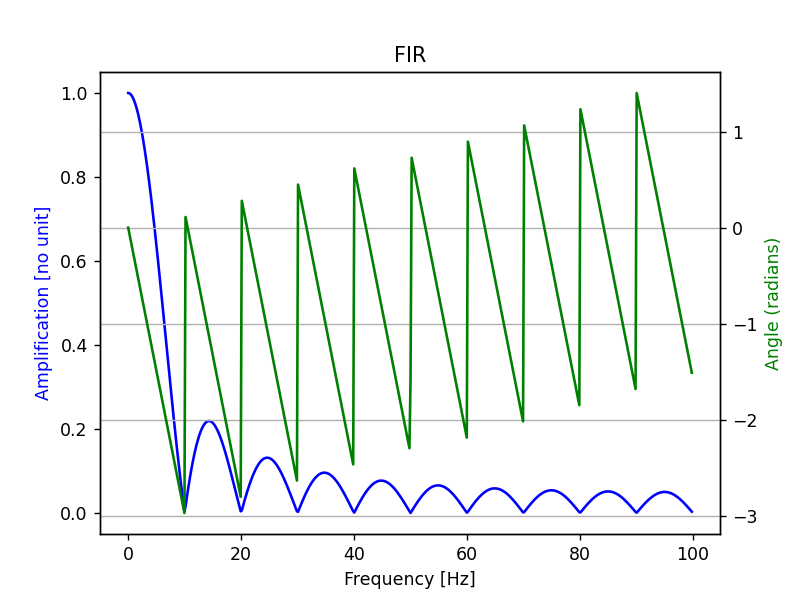

Text(0.5, 1.0, 'FIR')

In [10]:
# Perform the same analysis as before, but with higher filter order
### BEGIN SOLUTION
n=20

# Implement a IIR filter and plot its magnitude response
f_c = 9.2 # Hz (extracted from the MA plot)
iir_b, iir_a = signal.butter(n, 9.2, 'low', analog=False, fs=sampling_rate)
plot_freq_response(iir_b, iir_a, sampling_rate=sampling_rate, log_y=False)
plt.title('IIR')

# Implement a FIR filter and plot its magnitude response
fir_b = 1/n * np.ones(n)
fir_a = np.zeros(n)
fir_a[0] = 1

plot_freq_response(fir_b, fir_a, sampling_rate=sampling_rate, log_y=False)
plt.title('FIR')
### END SOLUTION

zeros:  [-1.04915401+0.01634985j -1.04915401-0.01634985j -1.02944112+0.04210454j
 -1.02944112-0.04210454j -0.99887451+0.05069352j -0.99887451-0.05069352j
 -0.9698616 +0.03996318j -0.9698616 -0.03996318j -0.95266876+0.01502443j
 -0.95266876-0.01502443j] 
 poles: [0.91760853+0.2694943j  0.91760853-0.2694943j  0.84870299+0.22485826j
 0.84870299-0.22485826j 0.79774501+0.1677341j  0.79774501-0.1677341j
 0.76439945+0.1031904j  0.76439945-0.1031904j  0.74796269+0.03479239j
 0.74796269-0.03479239j]


<IPython.core.display.Javascript object>


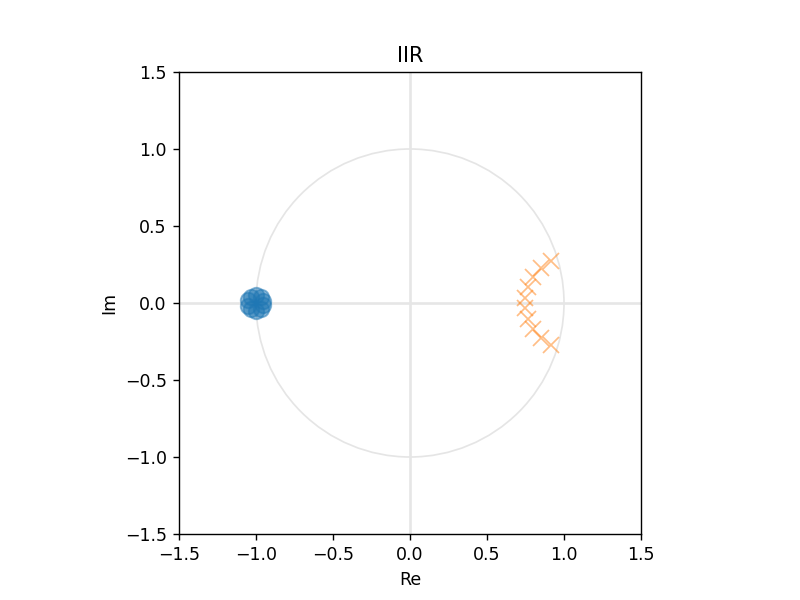

zeros:  [ 0.80901699+0.58778525j  0.80901699-0.58778525j  0.30901699+0.95105652j
  0.30901699-0.95105652j -1.        +0.j         -0.80901699+0.58778525j
 -0.80901699-0.58778525j -0.30901699+0.95105652j -0.30901699-0.95105652j] 
 poles: [0. 0. 0. 0. 0. 0. 0. 0. 0.]


<IPython.core.display.Javascript object>


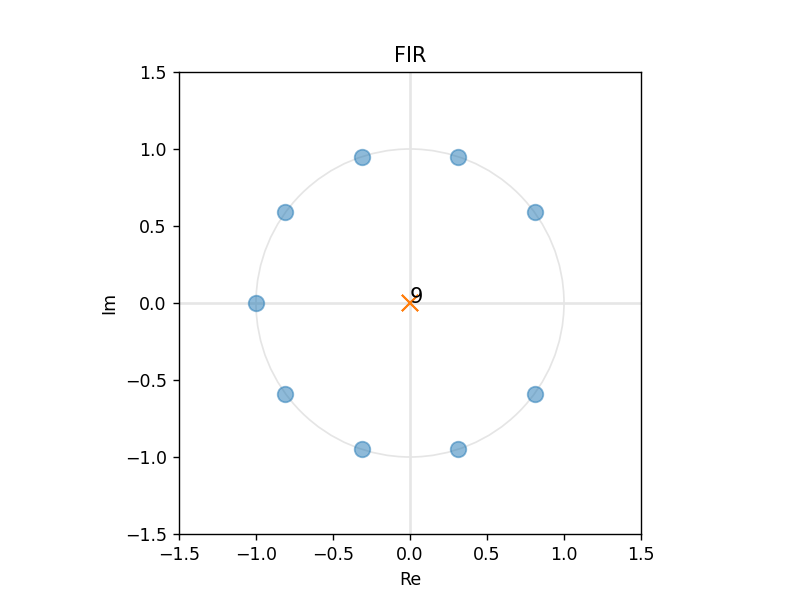

In [9]:
# Investigate strange behaviour of the IIR filter
### BEGIN SOLUTION
pole_zero_plot(iir_b, iir_a)
plt.title('IIR')
pole_zero_plot(fir_b, fir_a)
plt.title('FIR');
### END SOLUTION